# 2WH20 PROJECT

In [1]:
import numpy as np
import pandas as pd

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()
plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

from sklearn.linear_model import LinearRegression  # for linear regression
from sklearn.cluster import KMeans  # for clustering
from sklearn.tree import DecisionTreeClassifier  # for decision tree mining
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

from IPython.display import HTML
HTML("<style>.h,.c{display:none}.t{color:#296eaa}.t:active+.h{display:block;}</style>")

import math
import random
from collections import defaultdict, Counter, deque
from typing import List, Tuple, Set, Dict, DefaultDict
from typing import Any, Sequence, Iterable, Iterator, Generator
from itertools import product, chain, islice
from pprint import pprint  # pretty print
import doctest

In [2]:
df_data = pd.read_csv('biometrics_data_2.csv')

In [3]:
df_data.head(60)
df_data.fillna(0)

,name,letter,pressed for,time between keypresses,pressed for.1,time between keypresses.1,pressed for.2,time between keypresses.2,pressed for.3,time between keypresses.3,...,pressed for.7,time between keypresses.7,pressed for.8,time between keypresses.8,pressed for.9,time between keypresses.9,mean for pressed time,mean for time between keypresses,std for pressed for,std for time between keypresses
0,ANDREW,a,990215,0,804634,0,1086567,0,750289,0,...,779068,0,883856,0,798334,0,864873,0,149402,0
1,ANDREW,P,615342,1552579,494400,3023832,574403,771937,601326,972296,...,659583,939114,713535,1004114,935314,1156146,639006,1293362,137554,719023
2,ANDREW,p,1127206,833550,968342,894970,875661,666406,594233,698783,...,728171,802762,582042,734864,418489,1490580,756961,819547,212838,258346
3,ANDREW,l,1190746,5968888,873366,2898693,819055,447998,6567,326682,...,1059567,4617442,669912,934997,601316,1342443,689580,1862723,383549,1993500
4,ANDREW,E,1122516,588161,827018,78771,716660,232120,820239,341180,...,815267,254693,502651,137125,952132,911843,768879,360348,178819,281310
5,ANDREW,u,962397,0,1030637,0,746974,0,739223,0,...,898339,0,659003,0,918829,0,761053,0,287262,0
6,ANDREW,n,1001353,1593925,893024,1178805,943913,493016,697174,1213160,...,964101,513966,825304,1474789,842329,1183141,883364,838475,89698,548777
7,ANDREW,I,906754,12822381,743754,1709388,787492,1652225,764857,1319503,...,876030,939098,802131,1226419,374143,1199344,765461,2427188,152701,3660501
8,ANDREW,v,567597,847753,707470,1008461,712434,1241532,778707,312385,...,795730,19893,659434,933791,879834,340950,733490,574604,89532,411991
9,ANDREW,e,1664924,1923841,1512515,202185,1405051,2187668,1749638,1951361,...,1583858,1500416,1500072,2000099,1343908,1766112,1475679,1687886,162584,560723


In [4]:
trial1 = df_data[['name', 'letter', 'pressed for', 'time between keypresses']].copy()
trial1.columns = ['name', 'letter', 'pressed for (ns)', 'time between keypresses (ns)']
trial1['pressed for (s)'] = trial1['pressed for (ns)'] / 10 ** 7
trial1['time between keypresses (s)'] = trial1['time between keypresses (ns)'] / 10 ** 7

trial2 = df_data[['name', 'letter', 'pressed for.1', 'time between keypresses.1']].copy()
trial2.columns = ['name', 'letter', 'pressed for (ns)', 'time between keypresses (ns)']
trial2['pressed for (s)'] = trial2['pressed for (ns)'] / 10 ** 7
trial2['time between keypresses (s)'] = trial2['time between keypresses (ns)'] / 10 ** 7

trial3 = df_data[['name', 'letter', 'pressed for.2', 'time between keypresses.2']].copy()
trial3.columns = ['name', 'letter', 'pressed for (ns)', 'time between keypresses (ns)']
trial3['pressed for (s)'] = trial3['pressed for (ns)'] / 10 ** 7
trial3['time between keypresses (s)'] = trial3['time between keypresses (ns)'] / 10 ** 7

trial4 = df_data[['name', 'letter', 'pressed for.3', 'time between keypresses.3']].copy()
trial4.columns = ['name', 'letter', 'pressed for (ns)', 'time between keypresses (ns)']
trial4['pressed for (s)'] = trial4['pressed for (ns)'] / 10 ** 7
trial4['time between keypresses (s)'] = trial4['time between keypresses (ns)'] / 10 ** 7

trial5 = df_data[['name', 'letter', 'pressed for.4', 'time between keypresses.4']].copy()
trial5.columns = ['name', 'letter', 'pressed for (ns)', 'time between keypresses (ns)']
trial5['pressed for (s)'] = trial5['pressed for (ns)'] / 10 ** 7
trial5['time between keypresses (s)'] = trial5['time between keypresses (ns)'] / 10 ** 7

trial6 = df_data[['name', 'letter', 'pressed for.5', 'time between keypresses.5']].copy()
trial6.columns = ['name', 'letter', 'pressed for (ns)', 'time between keypresses (ns)']
trial6['pressed for (s)'] = trial6['pressed for (ns)'] / 10 ** 7
trial6['time between keypresses (s)'] = trial6['time between keypresses (ns)'] / 10 ** 7

trial7 = df_data[['name', 'letter', 'pressed for.6', 'time between keypresses.6']].copy()
trial7.columns = ['name', 'letter', 'pressed for (ns)', 'time between keypresses (ns)']
trial7['pressed for (s)'] = trial7['pressed for (ns)'] / 10 ** 7
trial7['time between keypresses (s)'] = trial7['time between keypresses (ns)'] / 10 ** 7

trial8 = df_data[['name', 'letter', 'pressed for.7', 'time between keypresses.7']].copy()
trial8.columns = ['name', 'letter', 'pressed for (ns)', 'time between keypresses (ns)']
trial8['pressed for (s)'] = trial8['pressed for (ns)'] / 10 ** 7
trial8['time between keypresses (s)'] = trial8['time between keypresses (ns)'] / 10 ** 7

trial9 = df_data[['name', 'letter', 'pressed for.8', 'time between keypresses.8']].copy()
trial9.columns = ['name', 'letter', 'pressed for (ns)', 'time between keypresses (ns)']
trial9['pressed for (s)'] = trial9['pressed for (ns)'] / 10 ** 7
trial9['time between keypresses (s)'] = trial9['time between keypresses (ns)'] / 10 ** 7

trial10 = df_data[['name', 'letter', 'pressed for.9', 'time between keypresses.9']].copy()
trial10.columns = ['name', 'letter', 'pressed for (ns)', 'time between keypresses (ns)']
trial10['pressed for (s)'] = trial10['pressed for (ns)'] / 10 ** 7
trial10['time between keypresses (s)'] = trial10['time between keypresses (ns)'] / 10 ** 7

means = df_data[['name', 'letter', 'mean for pressed time', 'mean for time between keypresses',
                'std for pressed for', 'std for time between keypresses']].copy()
means['mean for pressed time'] = means['mean for pressed time'] / 10 ** 7
means['mean for time between keypresses'] = means['mean for time between keypresses'] / 10 ** 7
means['std for pressed for'] = means['std for pressed for'] / 10 ** 7
means['std for time between keypresses'] = means['std for time between keypresses'] / 10 ** 7
means['mean - std'] = means['mean for pressed time'] - means['std for pressed for']
means['mean + std'] = means['mean for pressed time'] + means['std for pressed for']

names = ['ANDREW', 'GEORGI', 'ZOFIA', 'LUUK']
list_mean_std = list(means.groupby('name')['std for pressed for'].mean())
dict_mean_std = {names[i]: list_mean_std[i] for i in range(4)}
print(dict_mean_std)

means['lowerstripe'] = means['mean for pressed time']
means['upperstripe'] = means['mean for pressed time']

for index in range(60):
    means.at[index, 'lowerstripe'] = means.loc[index, 'mean for pressed time'] - dict_mean_std[means.loc[index, 'name']]
    means.at[index, 'upperstripe'] = means.loc[index, 'mean for pressed time'] + dict_mean_std[means.loc[index, 'name']]

# data is now in seconds

#trial11 = df_data[['name', 'letter', 'pressed for.10', 'time between keypresses.10']].copy()
#trial11.columns = ['name', 'letter', 'pressed for (ns)', 'time between keypresses (ns)']
#trial11['pressed for (s)'] = trial11['pressed for (ns)'] / 10 ** 9
#trial11['time between keypresses (s)'] = trial11['time between keypresses (ns)'] / 10 ** 9

#trial12 = df_data[['name', 'letter', 'pressed for.11', 'time between keypresses.11']].copy()
#trial12.columns = ['name', 'letter', 'pressed for (ns)', 'time between keypresses (ns)']
#trial12['pressed for (s)'] = trial12['pressed for (ns)'] / 10 ** 9
#trial12['time between keypresses (s)'] = trial12['time between keypresses (ns)'] / 10 ** 9

#trial13 = df_data[['name', 'letter', 'pressed for.12', 'time between keypresses.12']].copy()
#trial13.columns = ['name', 'letter', 'pressed for (ns)', 'time between keypresses (ns)']
#trial13['pressed for (s)'] = trial13['pressed for (ns)'] / 10 ** 9
#trial13['time between keypresses (s)'] = trial13['time between keypresses (ns)'] / 10 ** 9

#trial14 = df_data[['name', 'letter', 'pressed for.13', 'time between keypresses.13']].copy()
#trial14.columns = ['name', 'letter', 'pressed for (ns)', 'time between keypresses (ns)']
#trial14['pressed for (s)'] = trial14['pressed for (ns)'] / 10 ** 9
#trial14['time between keypresses (s)'] = trial14['time between keypresses (ns)'] / 10 ** 9

#trial15 = df_data[['name', 'letter', 'pressed for.14', 'time between keypresses.14']].copy()
#trial15.columns = ['name', 'letter', 'pressed for (ns)', 'time between keypresses (ns)']
#trial15['pressed for (s)'] = trial15['pressed for (ns)'] / 10 ** 9
#trial15['time between keypresses (s)'] = trial15['time between keypresses (ns)'] / 10 ** 9

means
trial1.head(30)

{'ANDREW': 0.021411713333333336, 'GEORGI': 0.007974486666666666, 'ZOFIA': 0.014691873333333333, 'LUUK': 0.015310473333333333}


,name,letter,pressed for (ns),time between keypresses (ns),pressed for (s),time between keypresses (s)
0,ANDREW,a,990215,0,0.099021,0.000000
1,ANDREW,P,615342,1552579,0.061534,0.155258
2,ANDREW,p,1127206,833550,0.112721,0.083355
3,ANDREW,l,1190746,5968888,0.119075,0.596889
4,ANDREW,E,1122516,588161,0.112252,0.058816
5,ANDREW,u,962397,0,0.096240,0.000000
6,ANDREW,n,1001353,1593925,0.100135,0.159392
7,ANDREW,I,906754,12822381,0.090675,1.282238
8,ANDREW,v,567597,847753,0.056760,0.084775
9,ANDREW,e,1664924,1923841,0.166492,0.192384


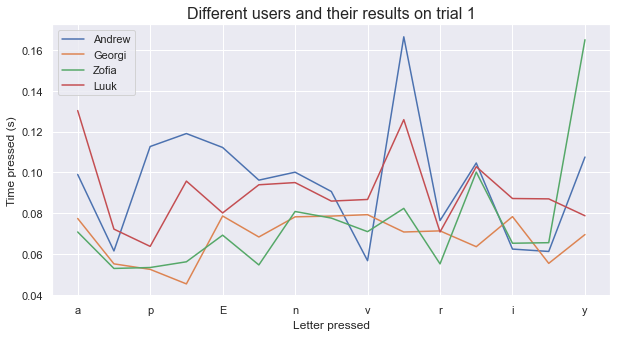

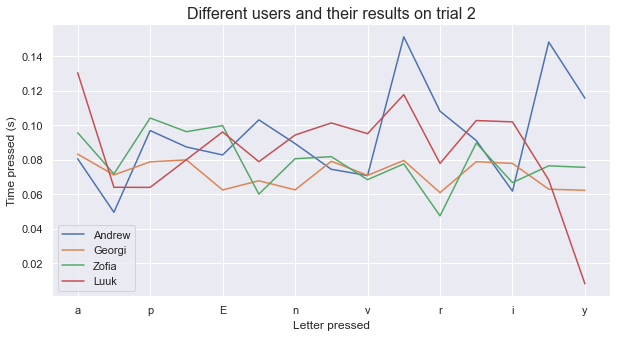

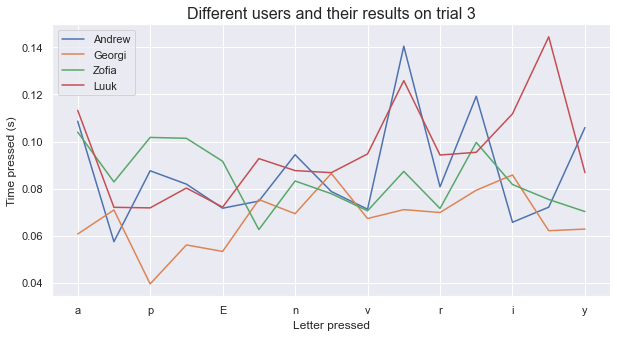

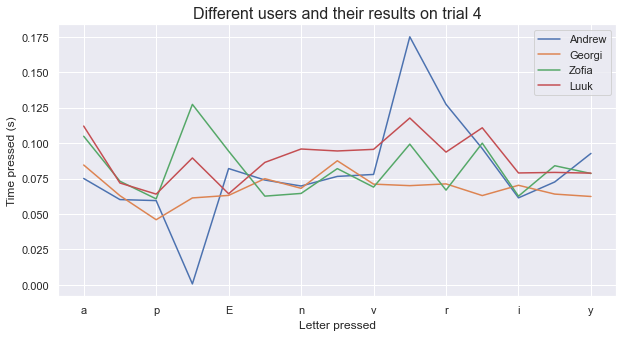

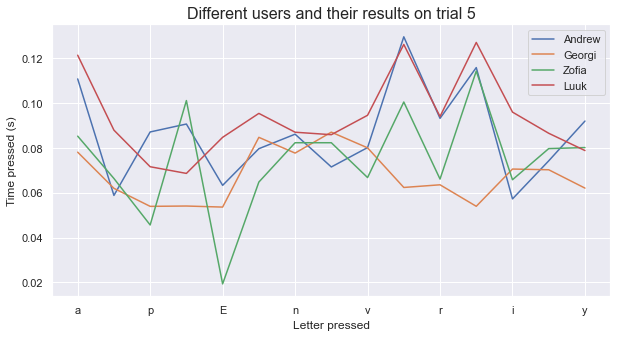

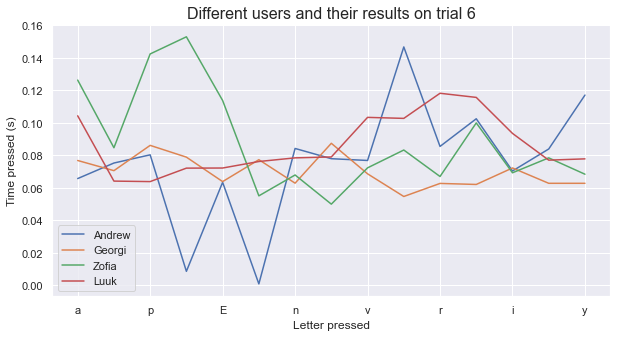

In [5]:
ax = trial1[trial1['name'] == 'ANDREW'].plot(x = 'letter', y = 'pressed for (s)')
trial1[trial1['name'] == 'GEORGI'].plot(x = 'letter', y = 'pressed for (s)', ax = ax)
trial1[trial1['name'] == 'ZOFIA'].plot(x = 'letter', y = 'pressed for (s)', ax = ax)
trial1[trial1['name'] == 'LUUK'].plot(x = 'letter', y = 'pressed for (s)', ax = ax)
ax.set_xlabel('Letter pressed')
ax.set_ylabel('Time pressed (s)')
ax.set_title("Different users and their results on trial 1", size = 16)
ax.legend(['Andrew', 'Georgi', 'Zofia', 'Luuk']);

axxx = trial2[trial2['name'] == 'ANDREW'].plot(x = 'letter', y = 'pressed for (s)')
trial2[trial2['name'] == 'GEORGI'].plot(x = 'letter', y = 'pressed for (s)', ax = axxx)
trial2[trial2['name'] == 'ZOFIA'].plot(x = 'letter', y = 'pressed for (s)', ax = axxx)
trial2[trial2['name'] == 'LUUK'].plot(x = 'letter', y = 'pressed for (s)', ax = axxx)
axxx.set_xlabel('Letter pressed')
axxx.set_ylabel('Time pressed (s)')
axxx.set_title("Different users and their results on trial 2", size = 16)
axxx.legend(['Andrew', 'Georgi', 'Zofia', 'Luuk']);

axx = trial3[trial3['name'] == 'ANDREW'].plot(x = 'letter', y = 'pressed for (s)')
trial3[trial3['name'] == 'GEORGI'].plot(x = 'letter', y = 'pressed for (s)', ax = axx)
trial3[trial3['name'] == 'ZOFIA'].plot(x = 'letter', y = 'pressed for (s)', ax = axx)
trial3[trial3['name'] == 'LUUK'].plot(x = 'letter', y = 'pressed for (s)', ax = axx)
axx.set_xlabel('Letter pressed')
axx.set_ylabel('Time pressed (s)')
axx.set_title("Different users and their results on trial 3", size = 16)
axx.legend(['Andrew', 'Georgi', 'Zofia', 'Luuk']);

axy = trial4[trial4['name'] == 'ANDREW'].plot(x = 'letter', y = 'pressed for (s)')
trial4[trial4['name'] == 'GEORGI'].plot(x = 'letter', y = 'pressed for (s)', ax = axy)
trial4[trial4['name'] == 'ZOFIA'].plot(x = 'letter', y = 'pressed for (s)', ax = axy)
trial4[trial4['name'] == 'LUUK'].plot(x = 'letter', y = 'pressed for (s)', ax = axy)
axy.set_xlabel('Letter pressed')
axy.set_ylabel('Time pressed (s)')
axy.set_title("Different users and their results on trial 4", size = 16)
axy.legend(['Andrew', 'Georgi', 'Zofia', 'Luuk']);

axz = trial5[trial5['name'] == 'ANDREW'].plot(x = 'letter', y = 'pressed for (s)')
trial5[trial5['name'] == 'GEORGI'].plot(x = 'letter', y = 'pressed for (s)', ax = axz)
trial5[trial5['name'] == 'ZOFIA'].plot(x = 'letter', y = 'pressed for (s)', ax = axz)
trial5[trial5['name'] == 'LUUK'].plot(x = 'letter', y = 'pressed for (s)', ax = axz)
axz.set_xlabel('Letter pressed')
axz.set_ylabel('Time pressed (s)')
axz.set_title("Different users and their results on trial 5", size = 16)
axz.legend(['Andrew', 'Georgi', 'Zofia', 'Luuk']);

axt = trial6[trial6['name'] == 'ANDREW'].plot(x = 'letter', y = 'pressed for (s)')
trial6[trial6['name'] == 'GEORGI'].plot(x = 'letter', y = 'pressed for (s)', ax = axt)
trial6[trial6['name'] == 'ZOFIA'].plot(x = 'letter', y = 'pressed for (s)', ax = axt)
trial6[trial6['name'] == 'LUUK'].plot(x = 'letter', y = 'pressed for (s)', ax = axt)
axt.set_xlabel('Letter pressed')
axt.set_ylabel('Time pressed (s)')
axt.set_title("Different users and their results on trial 6", size = 16)
axt.legend(['Andrew', 'Georgi', 'Zofia', 'Luuk']);

In [6]:
list_letters = ['a', 'P', 'p', 'l', 'E', 'u', 'n', 'I', 'v', 'e', 'r', 's', 'i', 't', 'y']
list_names = ['ANDREW', 'GEORGI', 'ZOFIA', 'LUUK']
pressed_means_andrew = defaultdict()
pressed_means_georgi = defaultdict()
pressed_means_zofia = defaultdict()
pressed_means_luuk = defaultdict()
between_means_andrew = defaultdict()
between_means_georgi = defaultdict()
between_means_zofia = defaultdict()
between_means_luuk = defaultdict()
       
means1 = trial1.groupby('name').mean()
pressed_means_andrew[1] = means1.loc['ANDREW']['pressed for (s)']
pressed_means_georgi[1] = means1.loc['GEORGI']['pressed for (s)']
pressed_means_zofia[1] = means1.loc['ZOFIA']['pressed for (s)']
pressed_means_luuk[1] = means1.loc['LUUK']['pressed for (s)']
means2 = trial2.groupby('name').mean()
pressed_means_andrew[2] = means2.loc['ANDREW']['pressed for (s)']
pressed_means_georgi[2] = means2.loc['GEORGI']['pressed for (s)']
pressed_means_zofia[2] = means2.loc['ZOFIA']['pressed for (s)']
pressed_means_luuk[2] = means2.loc['LUUK']['pressed for (s)']
means3 = trial3.groupby('name').mean()
pressed_means_andrew[3] = means3.loc['ANDREW']['pressed for (s)']
pressed_means_georgi[3] = means3.loc['GEORGI']['pressed for (s)']
pressed_means_zofia[3] = means3.loc['ZOFIA']['pressed for (s)']
pressed_means_luuk[3] = means3.loc['LUUK']['pressed for (s)']
means4 = trial4.groupby('name').mean()
pressed_means_andrew[4] = means4.loc['ANDREW']['pressed for (s)']
pressed_means_georgi[4] = means4.loc['GEORGI']['pressed for (s)']
pressed_means_zofia[4] = means4.loc['ZOFIA']['pressed for (s)']
pressed_means_luuk[4] = means4.loc['LUUK']['pressed for (s)']
means5 = trial5.groupby('name').mean()
pressed_means_andrew[5] = means5.loc['ANDREW']['pressed for (s)']
pressed_means_georgi[5] = means5.loc['GEORGI']['pressed for (s)']
pressed_means_zofia[5] = means5.loc['ZOFIA']['pressed for (s)']
pressed_means_luuk[5] = means5.loc['LUUK']['pressed for (s)']
means6 = trial6.groupby('name').mean()
pressed_means_andrew[6] = means6.loc['ANDREW']['pressed for (s)']
pressed_means_georgi[6] = means6.loc['GEORGI']['pressed for (s)']
pressed_means_zofia[6] = means6.loc['ZOFIA']['pressed for (s)']
pressed_means_luuk[6] = means6.loc['LUUK']['pressed for (s)']
means7 = trial7.groupby('name').mean()
pressed_means_andrew[7] = means7.loc['ANDREW']['pressed for (s)']
pressed_means_georgi[7] = means7.loc['GEORGI']['pressed for (s)']
pressed_means_zofia[7] = means7.loc['ZOFIA']['pressed for (s)']
pressed_means_luuk[7] = means7.loc['LUUK']['pressed for (s)']
means8 = trial8.groupby('name').mean()
pressed_means_andrew[8] = means8.loc['ANDREW']['pressed for (s)']
pressed_means_georgi[8] = means8.loc['GEORGI']['pressed for (s)']
pressed_means_zofia[8] = means8.loc['ZOFIA']['pressed for (s)']
pressed_means_luuk[8] = means8.loc['LUUK']['pressed for (s)']
means9 = trial9.groupby('name').mean()
pressed_means_andrew[9] = means9.loc['ANDREW']['pressed for (s)']
pressed_means_georgi[9] = means9.loc['GEORGI']['pressed for (s)']
pressed_means_zofia[9] = means9.loc['ZOFIA']['pressed for (s)']
pressed_means_luuk[9] = means9.loc['LUUK']['pressed for (s)']
means10 = trial10.groupby('name').mean()
pressed_means_andrew[10] = means10.loc['ANDREW']['pressed for (s)']
pressed_means_georgi[10] = means10.loc['GEORGI']['pressed for (s)']
pressed_means_zofia[10] = means10.loc['ZOFIA']['pressed for (s)']
pressed_means_luuk[10] = means10.loc['LUUK']['pressed for (s)']
#means11 = trial11.groupby('name').mean()
#pressed_means_andrew[11] = means11.loc['ANDREW']['pressed for (s)']
#pressed_means_georgi[11] = means11.loc['GEORGI']['pressed for (s)']
#pressed_means_zofia[11] = means11.loc['ZOFIA']['pressed for (s)']
#pressed_means_luuk[11] = means11.loc['LUUK']['pressed for (s)']
#means12 = trial12.groupby('name').mean()
#pressed_means_andrew[12] = means12.loc['ANDREW']['pressed for (s)']
#pressed_means_georgi[12] = means12.loc['GEORGI']['pressed for (s)']
#pressed_means_zofia[12] = means12.loc['ZOFIA']['pressed for (s)']
#pressed_means_luuk[12] = means12.loc['LUUK']['pressed for (s)']
#means13 = trial13.groupby('name').mean()
#pressed_means_andrew[13] = means13.loc['ANDREW']['pressed for (s)']
#pressed_means_georgi[13] = means13.loc['GEORGI']['pressed for (s)']
#pressed_means_zofia[13] = means13.loc['ZOFIA']['pressed for (s)']
#pressed_means_luuk[13] = means13.loc['LUUK']['pressed for (s)']
#means14 = trial14.groupby('name').mean()
#pressed_means_andrew[14] = means14.loc['ANDREW']['pressed for (s)']
#pressed_means_georgi[14] = means14.loc['GEORGI']['pressed for (s)']
#pressed_means_zofia[14] = means14.loc['ZOFIA']['pressed for (s)']
#pressed_means_luuk[14] = means14.loc['LUUK']['pressed for (s)']
#means15 = trial15.groupby('name').mean()
#pressed_means_andrew[15] = means15.loc['ANDREW']['pressed for (s)']
#pressed_means_georgi[15] = means15.loc['GEORGI']['pressed for (s)']
#pressed_means_zofia[15] = means15.loc['ZOFIA']['pressed for (s)']
#pressed_means_luuk[15] = means15.loc['LUUK']['pressed for (s)']


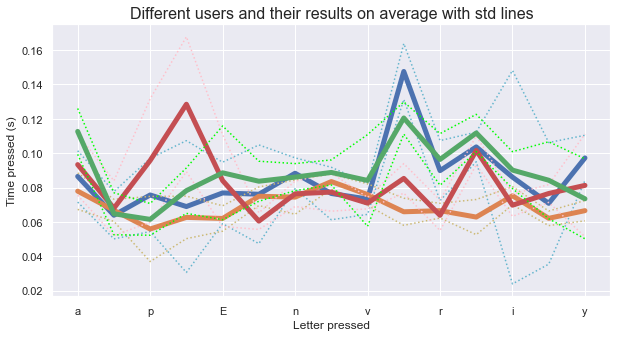

In [7]:
ax_mean = means[means['name'] == 'ANDREW'].plot(x = 'letter', y = 'mean for pressed time', linewidth = 5)
means[means['name'] == 'ANDREW'].plot(x = 'letter', y = 'mean - std', ax = ax_mean, color = 'c', linestyle = 'dotted')
means[means['name'] == 'ANDREW'].plot(x = 'letter', y = 'mean + std', ax = ax_mean, color = 'c', linestyle = 'dotted')
means[means['name'] == 'GEORGI'].plot(x = 'letter', y = 'mean for pressed time', ax = ax_mean, linewidth = 5)
means[means['name'] == 'GEORGI'].plot(x = 'letter', y = 'mean - std', ax = ax_mean, color = 'y', linestyle = 'dotted')
means[means['name'] == 'GEORGI'].plot(x = 'letter', y = 'mean + std', ax = ax_mean, color = 'y', linestyle = 'dotted')
means[means['name'] == 'ZOFIA'].plot(x = 'letter', y = 'mean for pressed time', ax = ax_mean, color = 'r', linewidth = 5)
means[means['name'] == 'ZOFIA'].plot(x = 'letter', y = 'mean - std', ax = ax_mean, color = 'pink', linestyle = 'dotted')
means[means['name'] == 'ZOFIA'].plot(x = 'letter', y = 'mean + std', ax = ax_mean, color = 'pink', linestyle = 'dotted')
means[means['name'] == 'LUUK'].plot(x = 'letter', y = 'mean for pressed time', ax = ax_mean, color = 'g', linewidth = 5)
means[means['name'] == 'LUUK'].plot(x = 'letter', y = 'mean - std', ax = ax_mean, color = 'lime', linestyle = 'dotted')
means[means['name'] == 'LUUK'].plot(x = 'letter', y = 'mean + std', ax = ax_mean, color = 'lime', linestyle = 'dotted')
ax_mean.set_xlabel('Letter pressed')
ax_mean.set_ylabel('Time pressed (s)')
ax_mean.set_title("Different users and their results on average with std lines", size = 16)
ax_mean.get_legend().remove();

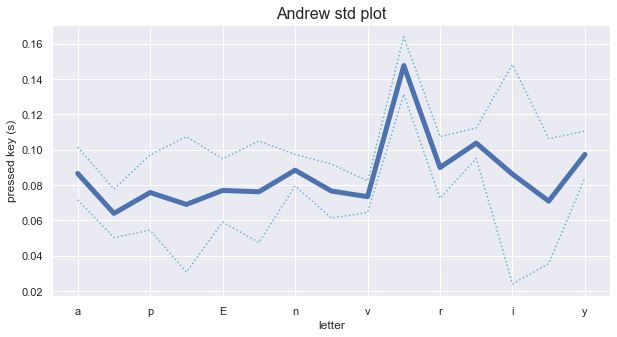

In [8]:
ax_mean_andrew = means[means['name'] == 'ANDREW'].plot(x = 'letter', y = 'mean for pressed time', linewidth = 5)
means[means['name'] == 'ANDREW'].plot(x = 'letter', y = 'mean - std', ax = ax_mean_andrew, color = 'c', linestyle = 'dotted')
means[means['name'] == 'ANDREW'].plot(x = 'letter', y = 'mean + std', ax = ax_mean_andrew, color = 'c', linestyle = 'dotted')
ax_mean_andrew.set_ylabel('pressed key (s)')
ax_mean_andrew.set_title("Andrew std plot", size = 16)
ax_mean_andrew.get_legend().remove();

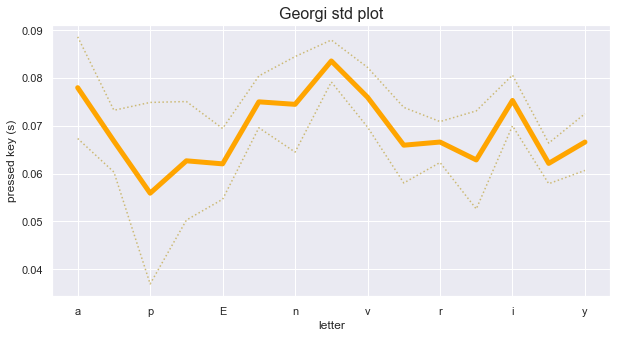

In [9]:
ax_mean_georgi = means[means['name'] == 'GEORGI'].plot(x = 'letter', y = 'mean for pressed time', color = 'orange', linewidth = 5)
means[means['name'] == 'GEORGI'].plot(x = 'letter', y = 'mean - std', ax = ax_mean_georgi, color = 'y', linestyle = 'dotted')
means[means['name'] == 'GEORGI'].plot(x = 'letter', y = 'mean + std', ax = ax_mean_georgi, color = 'y', linestyle = 'dotted')
ax_mean_georgi.set_ylabel('pressed key (s)')
ax_mean_georgi.set_title("Georgi std plot", size = 16)
ax_mean_georgi.get_legend().remove();

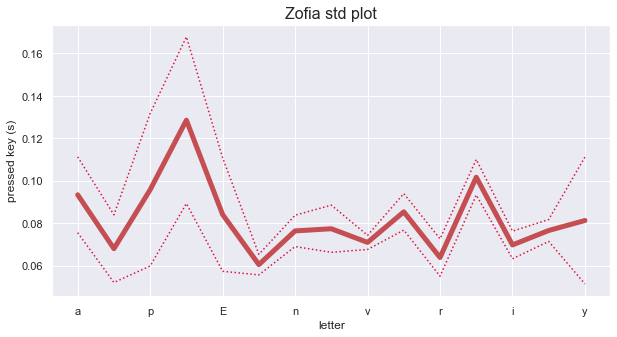

In [10]:
ax_mean_zofia = means[means['name'] == 'ZOFIA'].plot(x = 'letter', y = 'mean for pressed time', color = 'r', linewidth = 5)
means[means['name'] == 'ZOFIA'].plot(x = 'letter', y = 'mean - std', ax = ax_mean_zofia, color = 'crimson', linestyle = 'dotted')
means[means['name'] == 'ZOFIA'].plot(x = 'letter', y = 'mean + std', ax = ax_mean_zofia, color = 'crimson', linestyle = 'dotted')
ax_mean_zofia.set_ylabel('pressed key (s)')
ax_mean_zofia.set_title("Zofia std plot", size = 16)
ax_mean_zofia.get_legend().remove();

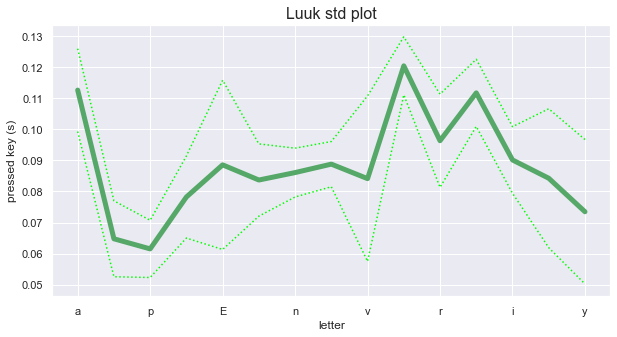

In [11]:
ax_mean_luuk = means[means['name'] == 'LUUK'].plot(x = 'letter', y = 'mean for pressed time', color = 'g', linewidth = 5)
means[means['name'] == 'LUUK'].plot(x = 'letter', y = 'mean - std', ax = ax_mean_luuk, color = 'lime', linestyle = 'dotted')
means[means['name'] == 'LUUK'].plot(x = 'letter', y = 'mean + std', ax = ax_mean_luuk, color = 'lime', linestyle = 'dotted')
ax_mean_luuk.set_ylabel('pressed key (s)')
ax_mean_luuk.set_title("Luuk std plot", size = 16)
ax_mean_luuk.get_legend().remove();

In [12]:
means

,name,letter,mean for pressed time,mean for time between keypresses,std for pressed for,std for time between keypresses,mean - std,mean + std,lowerstripe,upperstripe
0,ANDREW,a,0.086487,0.000000,0.014940,0.000000,0.071547,0.101428,0.065076,0.107899
1,ANDREW,P,0.063901,0.129336,0.013755,0.071902,0.050145,0.077656,0.042489,0.085312
2,ANDREW,p,0.075696,0.081955,0.021284,0.025835,0.054412,0.096980,0.054284,0.097108
3,ANDREW,l,0.068958,0.186272,0.038355,0.199350,0.030603,0.107313,0.047546,0.090370
4,ANDREW,E,0.076888,0.036035,0.017882,0.028131,0.059006,0.094770,0.055476,0.098300
5,ANDREW,u,0.076105,0.000000,0.028726,0.000000,0.047379,0.104831,0.054694,0.097517
6,ANDREW,n,0.088336,0.083848,0.008970,0.054878,0.079367,0.097306,0.066925,0.109748
7,ANDREW,I,0.076546,0.242719,0.015270,0.366050,0.061276,0.091816,0.055134,0.097958
8,ANDREW,v,0.073349,0.057460,0.008953,0.041199,0.064396,0.082302,0.051937,0.094761
9,ANDREW,e,0.147568,0.168789,0.016258,0.056072,0.131309,0.163826,0.126156,0.168980


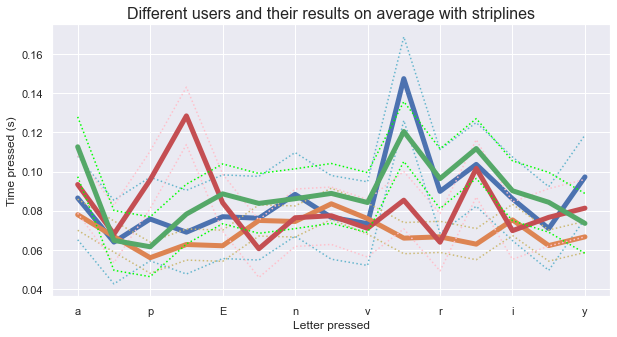

In [13]:
ax_stripe = means[means['name'] == 'ANDREW'].plot(x = 'letter', y = 'mean for pressed time', linewidth = 5)
means[means['name'] == 'ANDREW'].plot(x = 'letter', y = 'lowerstripe', ax = ax_stripe, color = 'c', linestyle = 'dotted')
means[means['name'] == 'ANDREW'].plot(x = 'letter', y = 'upperstripe', ax = ax_stripe, color = 'c', linestyle = 'dotted')
means[means['name'] == 'GEORGI'].plot(x = 'letter', y = 'mean for pressed time', ax = ax_stripe, linewidth = 5)
means[means['name'] == 'GEORGI'].plot(x = 'letter', y = 'lowerstripe', ax = ax_stripe, color = 'y', linestyle = 'dotted')
means[means['name'] == 'GEORGI'].plot(x = 'letter', y = 'upperstripe', ax = ax_stripe, color = 'y', linestyle = 'dotted')
means[means['name'] == 'ZOFIA'].plot(x = 'letter', y = 'mean for pressed time', ax = ax_stripe, color = 'r', linewidth = 5)
means[means['name'] == 'ZOFIA'].plot(x = 'letter', y = 'lowerstripe', ax = ax_stripe, color = 'pink', linestyle = 'dotted')
means[means['name'] == 'ZOFIA'].plot(x = 'letter', y = 'upperstripe', ax = ax_stripe, color = 'pink', linestyle = 'dotted')
means[means['name'] == 'LUUK'].plot(x = 'letter', y = 'mean for pressed time', ax = ax_stripe, color = 'g', linewidth = 5)
means[means['name'] == 'LUUK'].plot(x = 'letter', y = 'lowerstripe', ax = ax_stripe, color = 'lime', linestyle = 'dotted')
means[means['name'] == 'LUUK'].plot(x = 'letter', y = 'upperstripe', ax = ax_stripe, color = 'lime', linestyle = 'dotted')
ax_stripe.set_xlabel('Letter pressed')
ax_stripe.set_ylabel('Time pressed (s)')
ax_stripe.set_title("Different users and their results on average with striplines", size = 16)
ax_stripe.get_legend().remove();

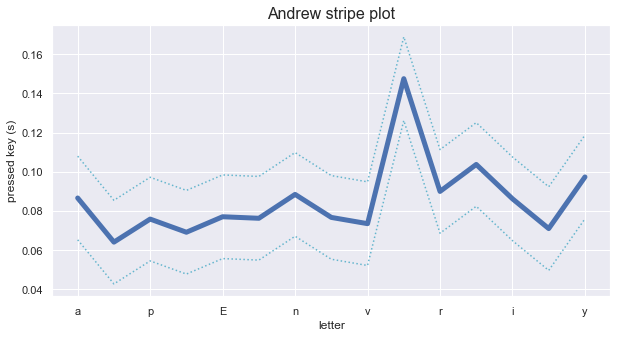

In [14]:
ax_stripe_andrew = means[means['name'] == 'ANDREW'].plot(x = 'letter', y = 'mean for pressed time', linewidth = 5)
means[means['name'] == 'ANDREW'].plot(x = 'letter', y = 'lowerstripe', ax = ax_stripe_andrew, color = 'c', linestyle = 'dotted')
means[means['name'] == 'ANDREW'].plot(x = 'letter', y = 'upperstripe', ax = ax_stripe_andrew, color = 'c', linestyle = 'dotted')
ax_stripe_andrew.set_ylabel('pressed key (s)')
ax_stripe_andrew.set_title("Andrew stripe plot", size = 16)
ax_stripe_andrew.get_legend().remove();

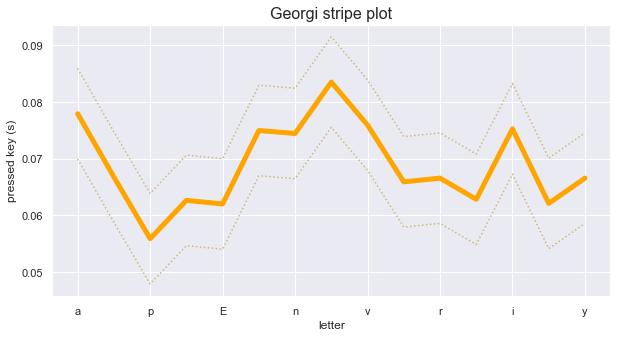

In [15]:
ax_stripe_georgi = means[means['name'] == 'GEORGI'].plot(x = 'letter', y = 'mean for pressed time', color = 'orange', linewidth = 5)
means[means['name'] == 'GEORGI'].plot(x = 'letter', y = 'lowerstripe', ax = ax_stripe_georgi, color = 'y', linestyle = 'dotted')
means[means['name'] == 'GEORGI'].plot(x = 'letter', y = 'upperstripe', ax = ax_stripe_georgi, color = 'y', linestyle = 'dotted')
ax_stripe_georgi.set_ylabel('pressed key (s)')
ax_stripe_georgi.set_title("Georgi stripe plot", size = 16)
ax_stripe_georgi.get_legend().remove();

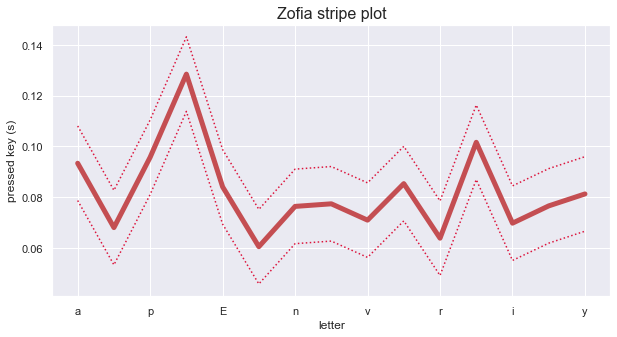

In [16]:
ax_stripe_zofia = means[means['name'] == 'ZOFIA'].plot(x = 'letter', y = 'mean for pressed time', color = 'r', linewidth = 5)
means[means['name'] == 'ZOFIA'].plot(x = 'letter', y = 'lowerstripe', ax = ax_stripe_zofia, color = 'crimson', linestyle = 'dotted')
means[means['name'] == 'ZOFIA'].plot(x = 'letter', y = 'upperstripe', ax = ax_stripe_zofia, color = 'crimson', linestyle = 'dotted')
ax_stripe_zofia.set_ylabel('pressed key (s)')
ax_stripe_zofia.set_title("Zofia stripe plot", size = 16)
ax_stripe_zofia.get_legend().remove();

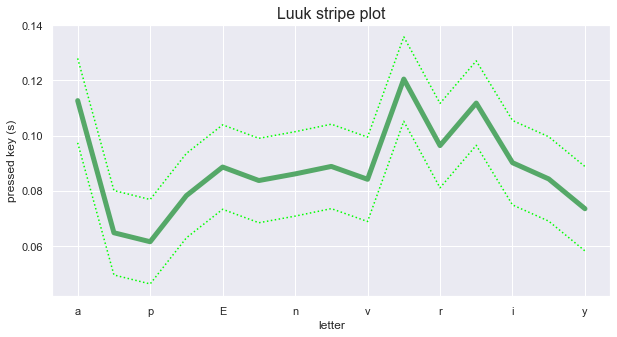

In [17]:
ax_stripe_luuk = means[means['name'] == 'LUUK'].plot(x = 'letter', y = 'mean for pressed time', color = 'g', linewidth = 5)
means[means['name'] == 'LUUK'].plot(x = 'letter', y = 'lowerstripe', ax = ax_stripe_luuk, color = 'lime', linestyle = 'dotted')
means[means['name'] == 'LUUK'].plot(x = 'letter', y = 'upperstripe', ax = ax_stripe_luuk, color = 'lime', linestyle = 'dotted')
ax_stripe_luuk.set_ylabel('pressed key (s)')
ax_stripe_luuk.set_title("Luuk stripe plot", size = 16)
ax_stripe_luuk.get_legend().remove();

In [18]:
dict_mean_std

{'ANDREW': 0.021411713333333336,
 'GEORGI': 0.007974486666666666,
 'ZOFIA': 0.014691873333333333,
 'LUUK': 0.015310473333333333}

In [19]:
andrew_model = LinearRegression()
georgi_model = LinearRegression()
zofia_model = LinearRegression()
luuk_model = LinearRegression()

n_int = {'ANDREW': 0, 'GEORGI': 1, 'ZOFIA': 2, 'LUUK': 3}

trial1['name_int'] = trial1['name'].map(n_int)
means

,name,letter,mean for pressed time,mean for time between keypresses,std for pressed for,std for time between keypresses,mean - std,mean + std,lowerstripe,upperstripe
0,ANDREW,a,0.086487,0.000000,0.014940,0.000000,0.071547,0.101428,0.065076,0.107899
1,ANDREW,P,0.063901,0.129336,0.013755,0.071902,0.050145,0.077656,0.042489,0.085312
2,ANDREW,p,0.075696,0.081955,0.021284,0.025835,0.054412,0.096980,0.054284,0.097108
3,ANDREW,l,0.068958,0.186272,0.038355,0.199350,0.030603,0.107313,0.047546,0.090370
4,ANDREW,E,0.076888,0.036035,0.017882,0.028131,0.059006,0.094770,0.055476,0.098300
5,ANDREW,u,0.076105,0.000000,0.028726,0.000000,0.047379,0.104831,0.054694,0.097517
6,ANDREW,n,0.088336,0.083848,0.008970,0.054878,0.079367,0.097306,0.066925,0.109748
7,ANDREW,I,0.076546,0.242719,0.015270,0.366050,0.061276,0.091816,0.055134,0.097958
8,ANDREW,v,0.073349,0.057460,0.008953,0.041199,0.064396,0.082302,0.051937,0.094761
9,ANDREW,e,0.147568,0.168789,0.016258,0.056072,0.131309,0.163826,0.126156,0.168980


In [20]:
means['n_int'] = means['name'].map(n_int)
andrew_value = sum(means['mean for time between keypresses'][i] for i in range(15) if 
                  means['mean for time between keypresses'][i] != 0) / 13
georgi_value = sum(means['mean for time between keypresses'][i] for i in range(15, 30) if 
                  means['mean for time between keypresses'][i] != 0) / 13
zofia_value = sum(means['mean for time between keypresses'][i] for i in range(30, 45) if 
                  means['mean for time between keypresses'][i] != 0) / 13
luuk_value = sum(means['mean for time between keypresses'][i] for i in range(45, 60) if 
                  means['mean for time between keypresses'][i] != 0) / 13

for i in range(15):
    if means['mean for time between keypresses'][i] == 0.000000:
        means['mean for time between keypresses'][i] = andrew_value
for i in range(15, 30):
    if means['mean for time between keypresses'][i] == 0.000000:
        means['mean for time between keypresses'][i] = georgi_value
for i in range(30, 45):
    if means['mean for time between keypresses'][i] == 0.000000:
        means['mean for time between keypresses'][i] = zofia_value
for i in range(45, 60):
    if means['mean for time between keypresses'][i] == 0.000000:
        means['mean for time between keypresses'][i] = luuk_value

#lib_between = {'ANDREW': andrew_value, 'GEORGI': georgi_value, 'ZOFIA': zofia_value, 'LUUK': luuk_value}
#means['mean time between pressed keys'] = means['name'].map(lib_between)

df_train = means[['name', 'mean for pressed time', 'mean for time between keypresses', 'n_int']].set_index('name', drop = True)
df_train['meanpressed^2'] = df_train['mean for pressed time'] ** 2
df_train['between^2'] = df_train['mean for time between keypresses'] ** 2

model = LinearRegression()
model.fit(df_train[['mean for pressed time', 'mean for time between keypresses',
                   'meanpressed^2', 'between^2']], df_train['n_int'])

print(f"z = {model.coef_[0]}*x {model.coef_[1]}*y \
{model.coef_[2]}*x^2 + {model.coef_[3]}*y^2 {model.intercept_}")
print("x = mean time pressed", '\n', "y = mean time between keypresses", '\n', "z = name integer code")

z = 78.56631733495334*x -6.3398435570329355*y -361.06208720434347*x^2 + 3.6059305176665504*y^2 -1.7690460254678348
x = mean time pressed 
 y = mean time between keypresses 
 z = name integer code


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [21]:
test = pd.DataFrame({'mean for pressed time': [0.06672645], 'mean time between pressed keys': [0.11298204444444444],
                           'meanpressed^2': [0.06672645**2], 'between^2': [0.11298204444444444**2]})
test

,mean for pressed time,mean time between pressed keys,meanpressed^2,between^2
0,0.066726,0.112982,0.004452,0.012765


In [22]:
person_int = round(model.predict(test)[0])
for user, number in n_int.items():
    if number == person_int:
        print(user)


GEORGI


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- mean time between pressed keys
Feature names seen at fit time, yet now missing:
- mean for time between keypresses

  warnings.warn(message, FutureWarning)


In [23]:
test_luuk=pd.DataFrame({'mean for pressed time': [0.07798858], 'mean time between pressed keys': [0.0884043], 'meanpressed^2':[0.07798858**2], 'between^2':[0.0884043**2]})

person_int = round(model.predict(test)[0])
for user, number in n_int.items():
    if number == person_int:
        print(user)

GEORGI


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- mean time between pressed keys
Feature names seen at fit time, yet now missing:
- mean for time between keypresses

  warnings.warn(message, FutureWarning)


In [24]:
def match_user(press_time:List, intervals:List, word:int)->str:
    """This function matches the given typing pattern for a given word to a user. Here 0 matches the word apple and 1 matches the word university."""
    assert word==1 or word==0, 'word must be either 0 or 1'
    weighted_list=[]
    if word == 0:
        assert len(press_time)==5, 'there need to be 5 presses to type apple'
        assert len(intervals)==4, 'there need to be 4 intervals to type apple'
        press_list=[]
        interval_list=[]
        for i in range (4):
            b=0
            distance_presses=0
            distance_intervals=0
            while b<5:
                if b!=0:
                    distance_intervals+=(means['mean for time between keypresses'][b+15*i]-intervals[b-1][1]/10**9)**2
                distance_presses+=(means['mean for pressed time'][b+15*i]-press_time[b][1]/10**9)**2
                b+=1
            else: 
                press_list.append(distance_presses)
                interval_list.append(distance_intervals)
        weight_list=[]
    
    
    if word == 1:
        assert len(press_time)==10, 'there need to be 10 presses to type university'
        assert len(intervals)==9, 'there need to be 9 intervals to type university'
        press_list=[]
        interval_list=[]
        for i in range (4):
            b=0
            distance_presses=0
            distance_intervals=0
            while b<10:
                if b!=0:
                    distance_intervals+=(means['mean for time between keypresses'][5+b+15*i]-intervals[b-1][1]/10**9)**2
                distance_presses+=(means['mean for pressed time'][5+b+15*i]-press_time[b][1]/10**9)**2
                b+=1
            else: 
                press_list.append(distance_presses)
                interval_list.append(distance_intervals)
    
    
    for i in range(len(press_list)):
        weighted_list.append(press_list[i]*interval_list[i])
        
    min_value=None
    person=None
    for i in range(len(weighted_list)):
        if min_value==None:
            min_value=weighted_list[i]
            person=i
        elif weighted_list[i]<min_value:
                min_value=weighted_list[i]
                person=i
        
        
    return press_list, interval_list, weighted_list, means['name'][15*person]
        

In [25]:
match_user([('a', 92376800), ('p', 80418200), ('p', 71677700), ('l', 47003600), ('e', 102289900)],
[('p', 106568300), ('p', 96076800), ('l', 135144000), ('e', 81830000)],0)

([0.0014509221419300002,
  0.00251184728688,
  0.007708122138660001,
  0.00192359515995],
 [0.005429114382750002,
  0.004528006953099999,
  0.034770195452399996,
  0.0028491016407800004],
 [7.877222269002604e-06,
  1.137366198011801e-05,
  0.0002680129133321797,
  5.480518126410012e-06],
 'LUUK')

In [26]:
match_user([('u', 77591000), ('n', 71989500), ('i', 79367500), ('v', 87070400), ('e', 118218400), ('r', 84323800), ('s', 101639500), ('i', 102085400), ('t', 77251200), ('y', 63260000)],[('n', 149673300), ('i', 87866700), ('v', 64982400), ('e', 102214700), ('r', -62442300), ('s', 94356100), ('i', 47135400), ('t', 991700), ('y', 111297400)],1)

([0.0028157437411900008,
  0.005671124914390002,
  0.003447372243830001,
  0.0008828262232100004],
 [0.38979804357884, 0.08400591086698, 0.02817201979501, 0.013601053226289997],
 [0.001097571401535226,
  0.0004764080140737561,
  9.711943909394682e-05,
  1.2007366451443788e-05],
 'LUUK')

([0.00020330235438999997,
  0.0005983062705200002,
  0.00479798338006,
  0.00061252988831],
 [0.009227354957100002,
  0.005237265684750001,
  0.03306960447895,
  0.00135908756069],
 [1.8759429875706676e-06,
  3.1334888995651482e-06,
  0.00015866741267515986,
  8.32481751752956e-07],
 'LUUK')

In [35]:
match_user([('a', 23006600), ('p', 51861300), ('p', 44203500), ('l', 66938200), ('e', 76116200)],[('p', 137456600), ('p', 93875600), ('l', 122285300), ('e', 83518300)], 0)

([0.005171202984670001,
  0.003590723016679999,
  0.011720365306180001,
  0.00878918687635],
 [0.006557067694220001,
  0.006689158160610002,
  0.025414311934029998,
  0.004583933936770002],
 [3.3907928031033706e-05,
  2.401891416951518e-05,
  0.00029786501987204153,
  4.02890519991143e-05],
 'GEORGI')

In [36]:
match_user([('a', 68087900), ('p', 56881800), ('p', 65204400), ('l', 77971900), ('e', 92718400)],[('p', 118955500), ('p', 58490400), ('l', 95152500), ('e', 40822200)], 0)

([0.0008297323661500002,
  0.0014580985003399998,
  0.004323351301420001,
  0.00208127029909],
 [0.008984069457779999,
  0.008354474888049999,
  0.02165531683777,
  0.00294993909747],
 [7.454373208859747e-06,
  1.2181647305393891e-05,
  9.36235422332354e-05,
  6.139620627688671e-06],
 'LUUK')

In [37]:
match_user([('a', 94021200), ('p', 67983400), ('p', 64491800), ('l', 67019800), ('e', 77649800)],[('p', 79872400), ('p', 69496700), ('l', 105155200), ('e', 42780300)], 0)

([0.00020330235438999997,
  0.0005983062705200002,
  0.00479798338006,
  0.00061252988831],
 [0.009227354957100002,
  0.005237265684750001,
  0.03306960447895,
  0.00135908756069],
 [1.8759429875706676e-06,
  3.1334888995651482e-06,
  0.00015866741267515986,
  8.32481751752956e-07],
 'LUUK')

In [38]:
match_user([('a', 80984400), ('p', 64632200), ('p', 64351800), ('l', 80016000), ('e', 80062000)],[('p', 45636600), ('p', 61529600), ('l', 88376100), ('e', 57943100)], 0)

([0.00029186456427000005,
  0.0007126604928399998,
  0.0035168001043400007,
  0.0010885850191500006],
 [0.017486447333500004,
  0.00399692069805,
  0.044411492889310004,
  0.005322436433489999],
 [5.103674331622283e-06,
  2.8484474745147086e-06,
  0.00015618634282702062,
  5.793924566875371e-06],
 'GEORGI')

In [39]:
match_user([('a', 83435300), ('p', 63586000), ('p', 63514500), ('l', 74335800), ('e', 72284500)],[('p', 68555300), ('p', 67924700), ('l', 69491800), ('e', 34100900)], 0)

([0.00020791708011999984,
  0.0003405367465899999,
  0.004229262706270002,
  0.00114139810042],
 [0.01753258385427,
  0.006259055594279999,
  0.03173472710598001,
  0.004135950337299998],
 [3.645323641938871e-06,
  2.1314384288020492e-06,
  0.00013421449784297698,
  4.720765858425677e-06],
 'GEORGI')

In [40]:
match_user([('a', 94113300), ('p', 69643800), ('p', 66829800), ('l', 67272900), ('e', 81076200)], [('p', 168261800), ('p', 63656600), ('l', 104608000), ('e', 21999100)], 0)

([0.00019013291683000016,
  0.0007749534182999999,
  0.004596877816940001,
  0.0005732668587300003],
 [0.008716081567949998,
  0.0185572064567,
  0.012632579682980004,
  0.007158731452119999],
 [1.6572140118425345e-06,
  1.4380970577718494e-05,
  5.807042531541773e-05,
  4.103863492048486e-06],
 'ANDREW')

In [41]:
match_user([('a', 80419900), ('p', 55617700), ('p', 63029000), ('l', 136132500), ('e', 39262400)], [('p', 39919200), ('p', 67687900), ('l', 89285800), ('e', 998100)], 0)

([0.006193966898079997,
  0.006098420729129998,
  0.0034565372707099987,
  0.006912886902219998],
 [0.018832893000380005,
  0.012688101227229999,
  0.043380033303390006,
  0.005751804333569999],
 [0.00011665031583943623,
  7.73773795374392e-05,
  0.00014994470191780854,
  3.976157284166827e-05],
 'LUUK')

In [42]:
match_user([('a', 93010800), ('p', 77496600), ('p', 65037000), ('l', 63912200), ('e', 73512900)], [('p', 22543700), ('p', 66914300), ('l', 89759700), ('e', 29023500)], 0)

([0.0003778744037,
  0.0005606623856300003,
  0.00531592181203,
  0.0009936318948799998],
 [0.020994691974860005,
  0.008880546078789998,
  0.05118145920759,
  0.006962791175749998],
 [7.9333567108654e-06,
  4.9789881502315455e-06,
  0.00027207663537315134,
  6.918451389614212e-06],
 'GEORGI')

In [43]:
match_user([('u', 70823900), ('n', 84059500), ('i', 69535100), ('v', 66209900), ('e', 128867800), ('r', 62165500), ('s', 83772700), ('i', 52932000), ('t', 50948300), ('y', 78563400)], [('n', 97586500), ('i', 99015500), ('v', 7863400), ('e', 112056500), ('r', -21228200), ('s', 364812800), ('i', 205160800), ('t', 14353400), ('y', 129419000)], 1)

([0.0035013234050099997,
  0.005586459725530002,
  0.00341254534929,
  0.005410305835669999],
 [0.11669715281723003,
  0.11910489416403001,
  0.10877217734108001,
  0.10200652770945999],
 [0.00040859447245699613,
  0.000665374694360867,
  0.0003711899879174497,
  0.0005518865121429249],
 'ZOFIA')

In [44]:
match_user([('u', 77084900), ('n', 72553300), ('i', 66717900), ('v', 53623800), ('e', 114202200), ('r', 77985000), ('s', 96228600), ('i', 67655500), ('t', 65743100), ('y', 91791800)], [('n', 113505000), ('i', 143609300), ('v', 35022400), ('e', 158804900), ('r', -11950500), ('s', 356075500), ('i', 194876700), ('t', 19251200), ('y', 143773500)], 1)

([0.00244002880469,
  0.00507078078765,
  0.0019983708445300004,
  0.003452046685410001],
 [0.10434870253776002,
  0.11389122710918,
  0.10794661292935,
  0.09704826454594999],
 [0.00025461383992416293,
  0.0005775174463071128,
  0.0002157173640437782,
  0.0003350151399506396],
 'ZOFIA')

In [55]:
match_user([('u', 86460100), ('n', 72178000), ('i', 69409500), ('v', 70865500), ('e', 131053200), ('r', 83172000), ('s', 101337600), ('i', 61034100), ('t', 63662300), ('y', 89920500)], [('n', 109844300), ('i', 109725000), ('v', 5986400), ('e', 143608500), ('r', -22614900), ('s', 188859000), ('i', 219423200), ('t', 7894600), ('y', 136714800)], 1)

([0.0014801495311599997,
  0.007112319989680001,
  0.00353685079072,
  0.00269289149702],
 [0.24385136976023, 0.07458889558819001, 0.0574310695358, 0.05221478974779999],
 [0.00036093649062332817,
  0.0005305000931000383,
  0.00020312512369958954,
  0.00014060876333053766],
 'LUUK')

In [54]:
match_user([('u', 76452700), ('n', 75742100), ('i', 64324800), ('v', 56515800), ('e', 164051800), ('r', 76179900), ('s', 106730400), ('i', 62411100), ('t', 91471300), ('y', 88607900)], [('n', 112191900), ('i', 104466200), ('v', 54770100), ('e', 180443600), ('r', 39482500), ('s', 133411900), ('i', 207929100), ('t', 7984400), ('y', 134179300)], 1)

([0.0021202648392800003,
  0.01391059955144,
  0.0073381996600799995,
  0.00490418066684],
 [0.2932537719855,
  0.05829671937874001,
  0.04085960332995,
  0.054317851123150004],
 [0.00062177566172709,
  0.0008109423184403244,
  0.0002998359272668427,
  0.00026638455534244563],
 'LUUK')

In [53]:
match_user([('u', 90731700), ('n', 97252300), ('i', 97032500), ('v', 54983500), ('e', 138430500), ('r', 59568000), ('s', 83187900), ('i', 73031700), ('t', 55280100), ('y', 86734300)], [('n', 42817900), ('i', 102656600), ('v', 21314200), ('e', 162050100), ('r', 38574700), ('s', 156564500), ('i', 213355000), ('t', 7987200), ('y', 133572900)], 1)

([0.0029931850098699996,
  0.007570793409370002,
  0.005662759176630002,
  0.0048954058897500005],
 [0.27233382585325006,
  0.06775450359653001,
  0.04565185766398,
  0.06942508160615998],
 [0.0008151455252244951,
  0.0005129553492837455,
  0.0002585154759169094,
  0.00033986395339117003],
 'ZOFIA')

In [52]:
match_user([('u', 85578900), ('n', 80919100), ('i', 60218800), ('v', 96290900), ('e', 137814500), ('r', 100610900), ('s', 99716900), ('i', 57555800), ('t', 86040200), ('y', 83190000)], [('n', 101439400), ('i', 129409200), ('v', 50882300), ('e', 223971600), ('r', 52367300), ('s', 158759600), ('i', 257901900), ('t', 89429900), ('y', 240194600)], 1)

([0.0024062241363400003,
  0.009962313972480001,
  0.005940069457300001,
  0.0026202356637799996],
 [0.26893499459932,
  0.07122532271396001,
  0.08516418735098999,
  0.10830378202647001],
 [0.0006471178751113514,
  0.000709569027667681,
  0.0005058811881393907,
  0.00028378143218801203],
 'LUUK')

In [51]:
match_user([('u', 100426900), ('n', 90505300), ('i', 70617800), ('v', 95311700), ('e', 143940400), ('r', 87150400), ('s', 96134300), ('i', 77024800), ('t', 63619000), ('y', 106928200)], [('n', 58291600), ('i', 110902600), ('v', 54551300), ('e', 193074700), ('r', 35743400), ('s', 157406300), ('i', 210670200), ('t', 29175400), ('y', 222733300)], 1)

([0.0014181108971200002,
  0.0107034808906,
  0.00732183394016,
  0.0033534236886399995],
 [0.2658399633205, 0.07025937104498, 0.05764059169328999, 0.08750383407283],
 [0.00037699054887478217,
  0.0007520198353655184,
  0.0004220348405908352,
  0.00029343743002665205],
 'LUUK')

In [56]:
match_user([('u', 87294200), ('n', 103701300), ('i', 69369300), ('v', 65665300), ('e', 137709400), ('r', 78143900), ('s', 84888400), ('i', 57815200), ('t', 80660900), ('y', 100448700)], [('n', 87015400), ('i', 143875400), ('v', 97301900), ('e', 191577000), ('r', 5250800), ('s', 152576400), ('i', 248648900), ('t', 29187900), ('y', 406466300)], 1)

([0.0019637011192999996,
  0.008883859732660003,
  0.005313242601000001,
  0.004181818852239999],
 [0.3141325126347201,
  0.14496710457505999,
  0.14932176235887,
  0.18999251837200998],
 [0.0006168623666693211,
  0.0012878674228946872,
  0.0007933827490215465,
  0.0007945142951126258],
 'ANDREW')

In [57]:
match_user([('u', 87123400), ('n', 96302700), ('i', 73425800), ('v', 71773800), ('e', 143228800), ('r', 87768100), ('s', 92585100), ('i', 69411000), ('t', 85139900), ('y', 85641600)], [('n', 111661500), ('i', 134487600), ('v', 69351800), ('e', 193567000), ('r', -26929600), ('s', 277048400), ('i', 237972100), ('t', 52909300), ('y', 341257300)], 1)

([0.0009602268971400003,
  0.008984614758899999,
  0.005222702981219999,
  0.002044819917979999],
 [0.18465239209618006,
  0.13065826231054,
  0.14270999054107,
  0.15558998010114997],
 [0.0001773081935119937,
  0.0011739141519275052,
  0.0007453318930487242,
  0.00031815349034894315],
 'ANDREW')

In [58]:
match_user([('u', 70999900), ('n', 89942100), ('i', 58390200), ('v', 56528800), ('e', 125986500), ('r', 85871800), ('s', 84074600), ('i', 56644500), ('t', 75353300), ('y', 79194200)], [('n', 129959600), ('i', 142767700), ('v', 54768700), ('e', 172966400), ('r', -36507500), ('s', 267530600), ('i', 244990100), ('t', 18518400), ('y', 296036400)], 1)

([0.00271911373293,
  0.006375486755309999,
  0.00348726676523,
  0.004008348309509999],
 [0.18016239130694,
  0.12148598823308002,
  0.12578013277313,
  0.12859826285234996],
 [0.000489882032360209,
  0.000774532308935748,
  0.00043862887674595295,
  0.0005154666295101396],
 'ZOFIA')